### Update Test

In [1]:
from cvfwVer2 import CVFW_MODEL, CVFW_UPDATE

In [2]:
hand_model = CVFW_MODEL(dsize=(28, 28))

hand_model.add_directory(class_name="A", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\A")
hand_model.add_directory(class_name="B", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\B")
hand_model.add_directory(class_name="C", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\C")

In [3]:
hand_model.train()

C: 100%|████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 407.05it/s]


In [4]:
cvfw_update = CVFW_UPDATE(hand_model, feature_group_number = [5, 3000], feature_weight_number = [80, 120, 300])
cvfw_update.add_validation(class_name="A", path="C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\A")
cvfw_update.add_validation(class_name="B", path="C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\B")
cvfw_update.add_validation(class_name="C", path="C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\C")
cvfw_update.update()

feature_group_number: 5, feature_weight_nummber: 80 Done!, accuracy: 0.8070829450139795
feature_group_number: 5, feature_weight_nummber: 120 Done!, accuracy: 0.6971109040074557
feature_group_number: 5, feature_weight_nummber: 300 Done!, accuracy: 0.3886300093196645
feature_group_number: 3000, feature_weight_nummber: 80 Done!, accuracy: 0.8070829450139795
feature_group_number: 3000, feature_weight_nummber: 120 Done!, accuracy: 0.6971109040074557
feature_group_number: 3000, feature_weight_nummber: 300 Done!, accuracy: 0.3886300093196645


In [5]:
cvfw_update.set(feature_group_number = [50, 100, 250], feature_weight_number = [0, 20, 40])
cvfw_update.update()

feature_group_number: 50, feature_weight_nummber: 0 Done!, accuracy: 0.6756756756756757
feature_group_number: 50, feature_weight_nummber: 20 Done!, accuracy: 0.9282385834109972
feature_group_number: 50, feature_weight_nummber: 40 Done!, accuracy: 0.9254426840633737
feature_group_number: 100, feature_weight_nummber: 0 Done!, accuracy: 0.6048462255358807
feature_group_number: 100, feature_weight_nummber: 20 Done!, accuracy: 0.9282385834109972
feature_group_number: 100, feature_weight_nummber: 40 Done!, accuracy: 0.9254426840633737
feature_group_number: 250, feature_weight_nummber: 0 Done!, accuracy: 0.5824790307548928
feature_group_number: 250, feature_weight_nummber: 20 Done!, accuracy: 0.9282385834109972
feature_group_number: 250, feature_weight_nummber: 40 Done!, accuracy: 0.9254426840633737


In [6]:
cvfw_update.set(feature_group_number = [10, 15], feature_weight_number = [18])
cvfw_update.update()

feature_group_number: 10, feature_weight_nummber: 18 Done!, accuracy: 0.9291705498602051
feature_group_number: 15, feature_weight_nummber: 18 Done!, accuracy: 0.9245107176141659


### 최적의 feature_group_number 와 feature_weight_number
- feature_group_number: 10
- feature_weight_number: 18
- accuracy: 92.91705498602051%

### Modeling Test

In [2]:
from time import time

start_time = time()
hand_model = CVFW_MODEL(dsize=(28, 28), feature_group_number = 10, feature_weight_number = 18)

hand_model.add_directory(class_name="A", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\A")
hand_model.add_directory(class_name="B", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\B")
hand_model.add_directory(class_name="C", path="C:\\kimdonghwan\\python\\CVFW\\image\\train\\hand_sign\\C")

hand_model.train()
print(time() - start_time)

C: 100%|████████████████████████████████████████████████████████████████████████████| 784/784 [00:01<00:00, 452.74it/s]

7.540928840637207


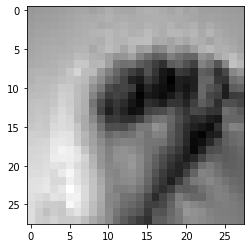

In [3]:
import matplotlib.pyplot as plt

A_img = hand_model.modeling(class_name="A")
plt.imshow(A_img, cmap="gray")

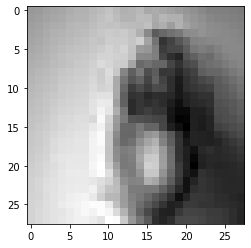

In [4]:
B_img = hand_model.modeling(class_name='B')
plt.imshow(B_img, cmap="gray")

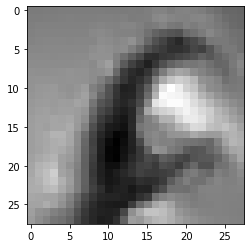

In [5]:
C_img = hand_model.modeling(class_name="C")
plt.imshow(C_img, cmap="gray")

### Modeling Predict Class 는 괜찮은 predict 방법일까?
- 각 클래스당 modeling 된 이미지로 유사도를 계산하여 predict를 하였을 때 86.1% 로 꽤 높은 정확도를 보여주었다.
- 원래 있었던 predict class 보다 좋은 방법인지 확인해보자.

### 결론
- 기존의 predict 방법이 더 좋다고 판단이 된다.
- 이유: modeling predict class 는 각 cost 들의 값이 너무 많이 비슷하여 불안정한 예측 방법이라고 판단되었기 때문이다.

0.9571295433364398
정확도가 약 95.7%로 꽤나 높은 수치임을 알 수 있다.
하지만 cost 들의 값이 많이 비슷하기 때문에 불안정한 예측 방법으로 판단된다.
but 속도는 기존의 predict_class 방법보다는 우월한 성능을 보여준다.
하나의 predict 안에서의 cost 가 전체 30% 를 넘는 원소의 개수:  3181
하나의 predict 안에서의 cost 가 전체 20% 를 넘는 원소의 개수:  3219


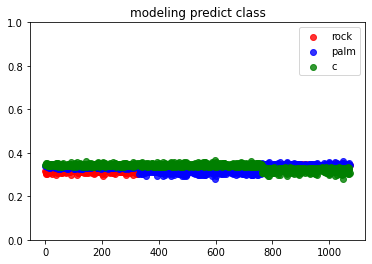

In [15]:
from cvfwVer2 import Weight
import cv2
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

A_Weight = Weight(28, 28, A_img.flatten().tolist())
B_Weight = Weight(28, 28, B_img.flatten().tolist())
C_Weight = Weight(28, 28, C_img.flatten().tolist())

count = 0
answer = 0

A_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\A")
B_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\B")
C_files = listdir("C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\C")

predicts = []

for file in A_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\A\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    img_weight = Weight(28, 28, img)
    A_cost = sum(sum(abs(A_Weight - img_weight)))
    B_cost = sum(sum(abs(B_Weight - img_weight)))
    C_cost = sum(sum(abs(C_Weight - img_weight)))
    
    sum_cost = sum([A_cost, B_cost, C_cost])
    predict = [A_cost / sum_cost, B_cost / sum_cost, C_cost / sum_cost]
    predicts.append(predict)
    
    if min(predict) == predict[0]: answer += 1
    count += 1
    
    
for file in B_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\B\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    img_weight = Weight(28, 28, img)
    A_cost = sum(sum(abs(A_Weight - img_weight)))
    B_cost = sum(sum(abs(B_Weight - img_weight)))
    C_cost = sum(sum(abs(C_Weight - img_weight)))
    
    sum_cost = sum([A_cost, B_cost, C_cost])
    predict = [A_cost / sum_cost, B_cost / sum_cost, C_cost / sum_cost]
    predicts.append(predict)
    
    if min(predict) == predict[1]: answer += 1
    count += 1


for file in C_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\C\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    img_weight = Weight(28, 28, img)
    A_cost = sum(sum(abs(A_Weight - img_weight)))
    B_cost = sum(sum(abs(B_Weight - img_weight)))
    C_cost = sum(sum(abs(C_Weight - img_weight)))
    
    sum_cost = sum([A_cost, B_cost, C_cost])
    predict = [A_cost / sum_cost, B_cost / sum_cost, C_cost / sum_cost]
    predicts.append(predict)
    
    if min(predict) == predict[2]: answer += 1
    count += 1

    
print(answer / count)
print("정확도가 약 95.7%로 꽤나 높은 수치임을 알 수 있다.")
print("하지만 cost 들의 값이 많이 비슷하기 때문에 불안정한 예측 방법으로 판단된다.")
print("but 속도는 기존의 predict_class 방법보다는 우월한 성능을 보여준다.")
print("하나의 predict 안에서의 cost 가 전체 30% 를 넘는 원소의 개수: ", (np.array(predicts) > 0.3).flatten().tolist().count(True))
print("하나의 predict 안에서의 cost 가 전체 20% 를 넘는 원소의 개수: ", (np.array(predicts) > 0.20).flatten().tolist().count(True))


x = [i for i in range(len(predicts))]
rock_y = [i[0] for i in predicts]
palm_y = [i[1] for i in predicts]
c_y = [i[2] for i in predicts]

plt.scatter(x, rock_y, color="red", label="rock", alpha=0.8)
plt.scatter(x, palm_y, color="blue", label="palm", alpha=0.8)
plt.scatter(x, c_y, color="green", label="c", alpha=0.8)
plt.ylim(0, 1.0)
plt.title("modeling predict class")
plt.legend()

0.9291705498602051


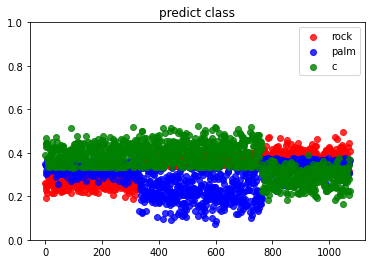

In [14]:
count = 0
answer = 0

predicts = []

for file in A_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\A\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    predict = hand_model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[0]: answer += 1
    count += 1
    
for file in B_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\B\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    predict = hand_model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[1]: answer += 1
    count += 1
    
for file in C_files:
    img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\C\\{file}", 1), cv2.COLOR_BGR2GRAY).flatten().tolist()
    predict = hand_model.predict_class(img)
    predicts.append(predict)
    
    if min(predict) == predict[2]: answer += 1
    count += 1

    
print(answer / count)


x = [i for i in range(len(predicts))]
rock_y = [i[0] for i in predicts]
palm_y = [i[1] for i in predicts]
c_y = [i[2] for i in predicts]

plt.scatter(x, rock_y, color="red", label="rock", alpha=0.8)
plt.scatter(x, palm_y, color="blue", label="palm", alpha=0.8)
plt.scatter(x, c_y, color="green", label="c", alpha=0.8)
plt.ylim(0, 1.0)
plt.title("predict class")
plt.legend()

### Predict Test

[0.27175654621909956, 0.32849842632180004, 0.3997450274591004]


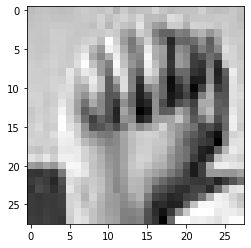

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\A\\3_A.jpg", 1), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

img = cv2.resize(img, dsize=(28, 28)).flatten().tolist()
predict = hand_model.predict_class(img)
print(predict)

# CVIW 의 predict 는 cost 비율이기 때문에 predict 값이 가장 작은 것이 예측값이다.

[0.3351385218856388, 0.31241429751714583, 0.3524471805972153]


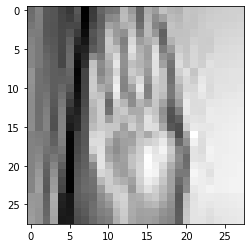

In [17]:
img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\B\\66_B.jpg", 1), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

img = cv2.resize(img, dsize=(28, 28)).flatten().tolist()
predict = hand_model.predict_class(img)
print(predict)

[0.4329115178716109, 0.3442923265552875, 0.22279615557310156]


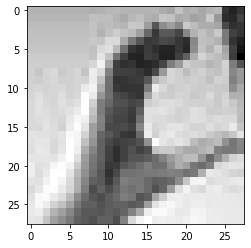

In [114]:
img = cv2.cvtColor(cv2.imread(f"C:\\kimdonghwan\\python\\CVFW\\image\\test\\hand_sign\\C\\20_c.jpg", 1), cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap="gray")

img = cv2.resize(img, dsize=(28, 28)).flatten().tolist()
predict = hand_model.predict_class(img)
print(predict)